#  Projet : les automates cellulaires en 2D

partie 1:

In [36]:
# Importer les bibliothèques nécessaires
import tkinter as tk

# Définir la taille de la grille
GRID_SIZE = 30

# Créer la grille initiale
grid = [[0] * GRID_SIZE for _ in range(GRID_SIZE)]

# Fonction pour calculer le voisinage d'une cellule
def get_neighborhood(row, col):
    neighborhood = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            neighbor_row = (row + i) % GRID_SIZE
            neighbor_col = (col + j) % GRID_SIZE
            neighborhood.append(grid[neighbor_row][neighbor_col])
    return neighborhood

# Fonction pour définir la fonction de transition
def transition(cell, neighborhood):
    alive_neighbors = sum(neighborhood) - cell
    if cell == 1:
        if alive_neighbors < 2 or alive_neighbors > 3:
            return 0
        else:
            return 1
    else:
        if alive_neighbors == 3:
            return 1
        else:
            return 0

# Fonction pour itérer la transition sur la grille
def iterate():
    new_grid = [[0] * GRID_SIZE for _ in range(GRID_SIZE)]
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            neighborhood = get_neighborhood(i, j)
            new_grid[i][j] = transition(grid[i][j], neighborhood)
    return new_grid

# Fonction pour afficher la grille en utilisant Tkinter
def display_grid():
    root = tk.Tk()
    canvas = tk.Canvas(root, width=300, height=300)
    canvas.pack()
    cell_size = 10
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            x1 = j * cell_size
            y1 = i * cell_size
            x2 = x1 + cell_size
            y2 = y1 + cell_size
            if grid[i][j] == 1:
                canvas.create_rectangle(x1, y1, x2, y2, fill="black")
            else:
                canvas.create_rectangle(x1, y1, x2, y2, fill="white")
    root.mainloop()

# Exemple d'utilisation
grid[1][2] = 1
grid[2][3] = 1
grid[3][1:4] = [1, 1, 1]

display_grid()
grid = iterate()
display_grid()

partie 2:

In [37]:
import tkinter as tk

# Définir la taille de la grille
GRID_SIZE = 30

# Créer la grille initiale
grid = [[0] * GRID_SIZE for _ in range(GRID_SIZE)]

# Fonction pour calculer le voisinage d'une cellule
def get_neighborhood(row, col):
    neighborhood = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            neighbor_row = (row + i) % GRID_SIZE
            neighbor_col = (col + j) % GRID_SIZE
            neighborhood.append(grid[neighbor_row][neighbor_col])
    return neighborhood

# Fonction pour définir la fonction de transition
def transition(cell, neighborhood):
    alive_neighbors = sum(neighborhood) - cell
    if cell == 1:
        if alive_neighbors < 2 or alive_neighbors > 3:
            return 0
        else:
            return 1
    else:
        if alive_neighbors == 3:
            return 1
        else:
            return 0

# Fonction pour itérer la transition sur la grille
def iterate():
    new_grid = [[0] * GRID_SIZE for _ in range(GRID_SIZE)]
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            neighborhood = get_neighborhood(i, j)
            new_grid[i][j] = transition(grid[i][j], neighborhood)
    return new_grid

# Fonction pour afficher la grille en utilisant Tkinter
def display_grid():
    root = tk.Tk()
    canvas = tk.Canvas(root, width=300, height=300)
    canvas.pack()
    cell_size = 10

    def toggle_cell(event):
        # Coordonnées du clic de souris
        x = event.x // cell_size
        y = event.y // cell_size
        # Inversion de l'état de la cellule
        grid[y][x] = 1 - grid[y][x]
        # Mise à jour de l'affichage
        draw_cells()

    def draw_cells():
        canvas.delete("all")
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                x1 = j * cell_size
                y1 = i * cell_size
                x2 = x1 + cell_size
                y2 = y1 + cell_size
                if grid[i][j] == 1:
                    canvas.create_rectangle(x1, y1, x2, y2, fill="black")
                else:
                    canvas.create_rectangle(x1, y1, x2, y2, fill="white")

    canvas.bind("<Button-1>", toggle_cell)
    draw_cells()
    root.mainloop()

# Fonction pour exécuter une itération et mettre à jour l'affichage
def step():
    global grid
    grid = iterate()
    display_grid()

# Fonction pour démarrer ou arrêter les transitions automatiques
def start_stop():
    global running
    running = not running
    if running:
        run()
    else:
        stop()

# Fonction pour exécuter les transitions automatiques
def run():
    global running
    running = True
    step()
    if running:
        root.after(1000, run)

# Fonction pour arrêter les transitions automatiques
def stop():
    global running
    running = False

# Fonction pour quitter le programme
def quit_program():
    root.destroy()

# Exemple d'utilisation
grid[1][2] = 1
grid[2][3] = 1
grid[3][1:4] = [1, 1, 1]

root = tk.Tk()

# Créer les boutons
step_button = tk.Button(root, text="Step", command=step)
step_button.pack(side=tk.LEFT)
start_stop_button = tk.Button(root, text="Start/Stop", command=start_stop)
start_stop_button.pack(side=tk.LEFT)
quit_button = tk.Button(root, text="Quit", command=quit_program)
quit_button.pack(side=tk.LEFT)

# Créer le canvas pour afficher la grille
canvas = tk.Canvas(root, width=300, height=300)
canvas.pack()

# Variables pour le fonctionnement des transitions automatiques
running = False

display_grid()

root.mainloop()


partie 3:

In [38]:
import tkinter as tk
import random

# Définir la taille de la grille
GRID_SIZE = 30

# Créer la grille initiale
grid = [['S'] * GRID_SIZE for _ in range(GRID_SIZE)]

# Paramètres du modèle
contamination_rate = 0.35  # Taux de contamination initial
incubation_period = 3  # Nombre d'itérations avant que les individus infectés ne deviennent rétablis
recovery_period = 5  # Nombre d'itérations avant que les individus infectés ne deviennent rétablis
total_iterations = 20  # Nombre total d'itérations à afficher

# Fonction pour calculer le voisinage d'une cellule
def get_neighborhood(row, col):
    neighborhood = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            neighbor_row = (row + i) % GRID_SIZE
            neighbor_col = (col + j) % GRID_SIZE
            neighborhood.append(grid[neighbor_row][neighbor_col])
    return neighborhood

# Fonction pour définir la fonction de transition
def transition(cell, neighborhood):
    if cell == 'S':
        if 'I' in neighborhood:
            return 'I'
    elif cell == 'I':
        return 'I' * incubation_period if cell == 'I' else 'R'
    return cell

# Fonction pour itérer la transition sur la grille
def iterate():
    new_grid = [['S'] * GRID_SIZE for _ in range(GRID_SIZE)]
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            neighborhood = get_neighborhood(i, j)
            new_grid[i][j] = transition(grid[i][j], neighborhood)
    return new_grid

# Fonction pour afficher la grille en utilisant Tkinter
def display_grid():
    root = tk.Tk()
    canvas = tk.Canvas(root, width=300, height=300)
    canvas.pack()
    cell_size = 10
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            x1 = j * cell_size
            y1 = i * cell_size
            x2 = x1 + cell_size
            y2 = y1 + cell_size
            if grid[i][j] == 'S':
                canvas.create_rectangle(x1, y1, x2, y2, fill="white")
            elif grid[i][j] == 'I':
                canvas.create_rectangle(x1, y1, x2, y2, fill="red")
            else:
                canvas.create_rectangle(x1, y1, x2, y2, fill="green")
    root.mainloop()

# Exemple d'utilisation
# Initialisation de la grille avec un taux de contamination initial
num_initial_infections = int(GRID_SIZE**2 * contamination_rate)
infection_indices = random.sample(range(GRID_SIZE**2), num_initial_infections)
for index in infection_indices:
    row = index // GRID_SIZE
    col = index % GRID_SIZE
    grid[row][col] = 'I'

def step(btn=None):
    global total_iterations
    if total_iterations > 0:
        grid = iterate()
        display_grid()
        total_iterations -= 1

def start_stop(btn):
    if btn['text'] == 'Start':
        btn['text'] = 'Stop'
        run()
    else:
        btn['text'] = 'Start'

def run():
    step()
    root.after(500, run)

def quit_program():
    root.destroy()

root = tk.Tk()
step_button = tk.Button(root, text='Step', command=step)
step_button.pack(side=tk.LEFT)
start_stop_button = tk.Button(root, text='Start', command=lambda: start_stop(start_stop_button))
start_stop_button.pack(side=tk.LEFT)
quit_button = tk.Button(root, text='Quit', command=quit_program)
quit_button.pack(side=tk.LEFT)
root.mainloop()

In [ ]:
un affichage simple de la première partie:

État initial:
                              
  █                           
   █                          
 ███                          
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              
                              

État suivant:
                              
          

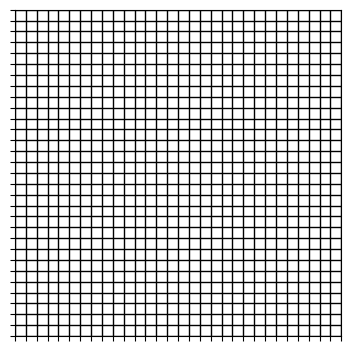

In [19]:
# Importer les bibliothèques nécessaires
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.widgets import Button
# Définir la taille de la grille
GRID_SIZE = 30

# Créer la grille initiale
grid = [[0] * GRID_SIZE for _ in range(GRID_SIZE)]

# Fonction pour calculer le voisinage d'une cellule
def get_neighborhood(row, col):
    neighborhood = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            neighbor_row = (row + i) % GRID_SIZE
            neighbor_col = (col + j) % GRID_SIZE
            neighborhood.append(grid[neighbor_row][neighbor_col])
    return neighborhood

# Fonction pour définir la fonction de transition
def transition(cell, neighborhood):
    alive_neighbors = sum(neighborhood) - cell
    if cell == 1:
        if alive_neighbors < 2 or alive_neighbors > 3:
            return 0
        else:
            return 1
    else:
        if alive_neighbors == 3:
            return 1
        else:
            return 0

# Fonction pour itérer la transition sur la grille
def iterate():
    new_grid = [[0] * GRID_SIZE for _ in range(GRID_SIZE)]
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            neighborhood = get_neighborhood(i, j)
            new_grid[i][j] = transition(grid[i][j], neighborhood)
    return new_grid

# Fonction pour afficher la grille
def print_grid():
    for row in grid:
        for cell in row:
            if cell == 1:
                print("█", end="")
            else:
                print(" ", end="")
        print()
    print()

# Exemple d'utilisation
grid[1][2] = 1
grid[2][3] = 1
grid[3][1:4] = [1, 1, 1]

print("État initial:")
print_grid()

for _ in range(10):
    grid = iterate()
    print("État suivant:")
    print_grid()
    time.sleep(1)
    
    # Définir la taille de la grille
GRID_SIZE = 30

# Créer la grille initiale
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Créer la figure et l'axe
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)

# Affichage de la grille
def update_grid():
    ax.clear()
    ax.imshow(grid, cmap='binary', norm=colors.Normalize(vmin=0, vmax=1))
    ax.set_xticks(np.arange(-.5, GRID_SIZE, 1))
    ax.set_yticks(np.arange(-.5, GRID_SIZE, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color='black', linewidth=1)
    plt.draw()

# Fonction pour calculer le voisinage d'une cellule
def get_neighborhood(row, col):
    neighborhood = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            neighbor_row = (row + i) % GRID_SIZE
            neighbor_col = (col + j) % GRID_SIZE
            neighborhood.append(grid[neighbor_row, neighbor_col])
    return neighborhood

# Fonction pour définir la fonction de transition
def transition(cell, neighborhood):
    alive_neighbors = sum(neighborhood) - cell
    if cell == 1:
        if alive_neighbors < 2 or alive_neighbors > 3:
            return 0
        else:
            return 1
    else:
        if alive_neighbors == 3:
            return 1
        else:
            return 0

# Fonction pour itérer la transition sur la grille
def iterate():
    new_grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            neighborhood = get_neighborhood(i, j)
            new_grid[i, j] = transition(grid[i, j], neighborhood)
    return new_grid

# Fonction pour faire progresser l'AC d'une étape
def step(btn):
    global grid
    grid = iterate()
    update_grid()

# Fonction pour démarrer/arrêter les transitions automatiques
def start_stop(btn):
    global is_running
    is_running = not is_running
    if is_running:
        btn.label.set_text('Stop')
        update()
    else:
        btn.label.set_text('Start')

# Fonction pour quitter le programme
def quit_program(btn):
    plt.close()

# Fonction pour gérer la sélection d'une cellule
def toggle_cell(event):
    if event.inaxes == ax:
        x, y = int(event.xdata), int(event.ydata)
        grid[y, x] = 1 - grid[y, x]  # Inverser l'état de la cellule
        update_grid()

# Créer les boutons
step_button = Button(ax, 'Step')
step_button.on_clicked(step)

start_stop_button = Button(ax, 'Start')
start_stop_button.on_clicked(start_stop)

quit_button = Button(ax, 'Quit')
quit_button.on_clicked(quit_program)

# Ajouter l'événement de clic de souris pour sélectionner les cellules
fig.canvas.mpl_connect('button_press_event', toggle_cell)

# Mettre à jour l'affichage initial de la grille
update_grid()

# Afficher la figure
plt.show()